In [48]:
import pandas as pd


In [28]:
from sklearn.datasets import fetch_california_housing


In [76]:
df = fetch_california_housing() 
print(df)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [19]:
import numpy as np
import matplotlib.pyplot as pit

In [62]:
dataset=pd.DataFrame(df.data)

In [64]:
dataset


,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [82]:
dataset.columns=df.feature_names

In [84]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [115]:
##independent feature and dependent feature
y=df.target
x=dataset


In [126]:
 ##train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [133]:
##standardizing the dataset
from sklearn.preprocessing import StandardScaler



In [135]:
# StandardScaler Object बनाना
scaler = StandardScaler()

In [137]:
# Data को Scale करना
x_train=scaler.fit_transform(x_train)


In [139]:
x_test=scaler.transform(x_test)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [180]:
Regression=LinearRegression()
Regression.fit(x_train,y_train)

LinearRegression()

In [176]:
mse=cross_val_score(Regression,x_train,y_train,scoring='neg_mean_squared_error',cv=5)  #mean square error

In [178]:
np.mean(mse)

-0.5192652011433678

In [182]:
##prediction
reg_pred=Regression.predict(x_test)

In [184]:
reg_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

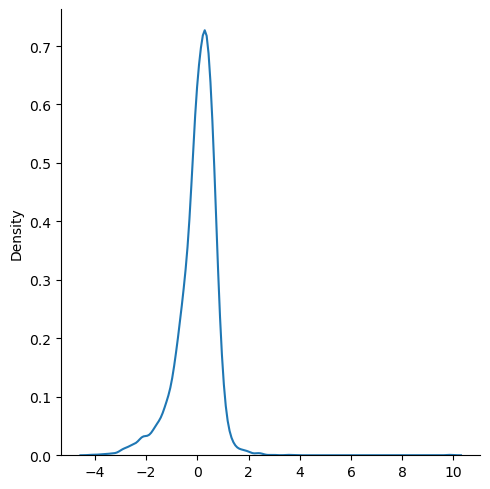

In [190]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [194]:
from sklearn.metrics import r2_score

In [198]:
score=r2_score(reg_pred,y_test)

In [200]:
score

0.33767016589309906